**Background of the project**

Sentiment Analysis involves monitoring emotion in conversions on social media platforms, for example, twitter, facebook etc. is a major strategy in social media marketing.

Twitter is one of the major social media platform, to reach the customers and connect with them. In twitter people put comments, share their thoughts and experiences, which often help organizations to analyze sentiment and take important feedback to shape the future strategy. 

In this project, we will conduct a sentiment analysis for us airline companies based on the customers reaction, either positive or negative using Natural Language Processing. 


**Data Description:**

To conduct the sentiment analysis,  Twitter data was scraped from February of 2015 about major US airlines, and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

**Dataset:**

The dataset has the following columns:

tweet_id - A ID for a tweet                                                          

airline_sentiment - Whether Sentiment was positve or negative                                             

airline_sentiment_confidence                               

negativereason - What were the reason behind negative sentiments                                               

negativereason_confidence                                    

airline - Name of the major airlines                                                                    
airline_sentiment_gold - Sentiment of gold customer of the airline companies                                               

name     - Name of the person who tweeted

negativereason_gold - Reasons behind the negative sentiment from gold customers

retweet_count - How many times were retweeted

text - the text of tweet

tweet_coord

tweet_created - when was tweet created

tweet_location  - From which location was tweeter created

user_timezone - the timezone of user

In [ ]:
#Importing the Libraries
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                         # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Tweets.csv to Tweets (1).csv


In [ ]:
#reading the csv file
tw=pd.read_csv('Tweets.csv')
t=tw.copy()

In [ ]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

In [ ]:
#first five rows from the dataset
t.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Shape of the data
t.shape

(14640, 15)

In [ ]:
#Datatpe and missing values in the data
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
#Checking the categories in a few columns
cat_col=['tweet_location', 'airline_sentiment', 'name', 'tweet_location', 'airline']
for column in cat_col:
    print(t[column].value_counts())
    print('-'*30)

Boston, MA              157
New York, NY            156
Washington, DC          150
New York                127
USA                     126
                       ... 
Seattle (duh!)            1
South ~O-H-I-O~ Side      1
Pocono Raceway            1
denver, co                1
Nigeria,lagos             1
Name: tweet_location, Length: 3081, dtype: int64
------------------------------
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
------------------------------
JetBlueNews       63
kbosspotter       32
_mhertz           29
otisday           28
throthra          27
                  ..
ChrisJLeary        1
tracy_edes         1
NGottesman         1
chadlacalamita     1
sanyabun           1
Name: name, Length: 7701, dtype: int64
------------------------------
Boston, MA              157
New York, NY            156
Washington, DC          150
New York                127
USA                     126
                       ... 
Seattle (duh!)         

In [ ]:
#Checking the amount fo missing values in each column of the dataset
t.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
#Columns in the data
t.columns  

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
# Mean, Mode, Median, IQR, MIn and Max of a few numerical columns from the dataset
num_col =['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']
t[num_col].describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,14640.000000,10522.000000,14640.000000
mean,0.900169,0.638298,0.082650
std,0.162830,0.330440,0.745778
min,0.335000,0.000000,0.000000
25%,0.692300,0.360600,0.000000
50%,1.000000,0.670600,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,44.000000


## **A  few observations from the dataset**
- There are 14640 rows and 15 columns in the data set
- There are many nan values in the dataset
- Negative Reson gold, negative reason, tweet_coord these columns are completely with nan values. There are also some other columns by which almost 50 percent of the data are missing
- Text is our predictor column from the dataset
- Sentiment is our target column
- Except two columns for X and y, we will use only the rest only for EDA. Before model building, we will drop those columns


### **EDA - Exploratory Data Analysis**

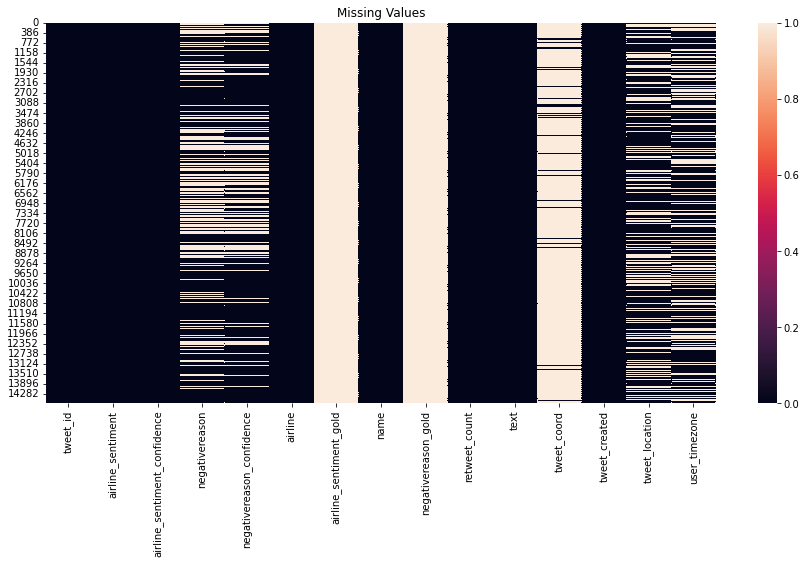

In [ ]:
#Checking the missing values using visualization
plt.figure(figsize=(15, 7))
sns.heatmap(t.isnull())
plt.title("Missing Values", )
plt.show()

Text(0.5, 0.98, 'Characters in message')

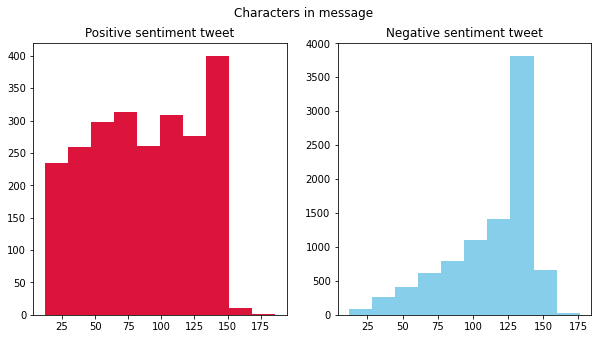

In [ ]:
#Number of characters in tweets
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = t[t['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')
tweet_len = t[t['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')
fig.suptitle('Characters in message')

Text(0.5, 0.98, 'Words in a tweet')

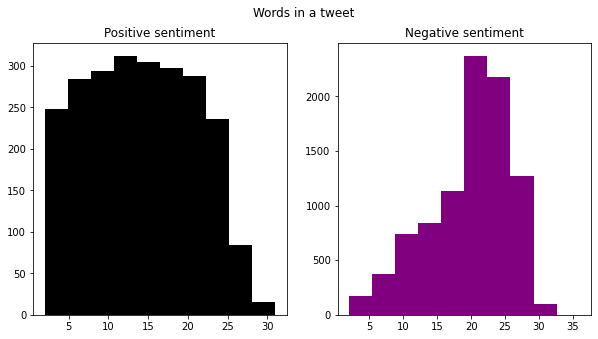

In [ ]:
#Number of words in a tweet
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = t[t['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black')
ax1.set_title('Positive sentiment')
tweet_len = t[t['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple')
ax2.set_title('Negative sentiment')
fig.suptitle('Words in a tweet')

- The number of characters and words, both are more in postive sentiment in cmparison of negative statement

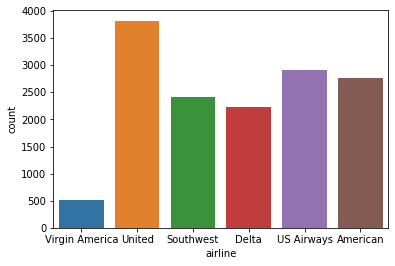

In [ ]:
#The number of times, each airlines were tweeted
sns.countplot(x='airline', data=t)

- The highest number of twets for United airlines and the lowest number of tweet was for virgin america

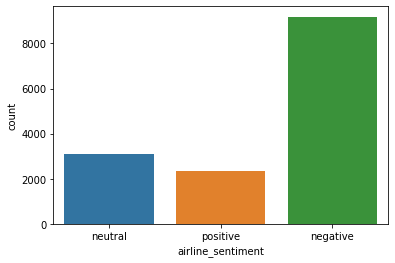

In [ ]:
#Distribution of different categories of tweet
sns.countplot(x='airline_sentiment', data=t)

- Among the total number of tweets, the majority was negative tweet followed by neutral and positive. We can assume the overall sentiment is negative toward the airlines companies

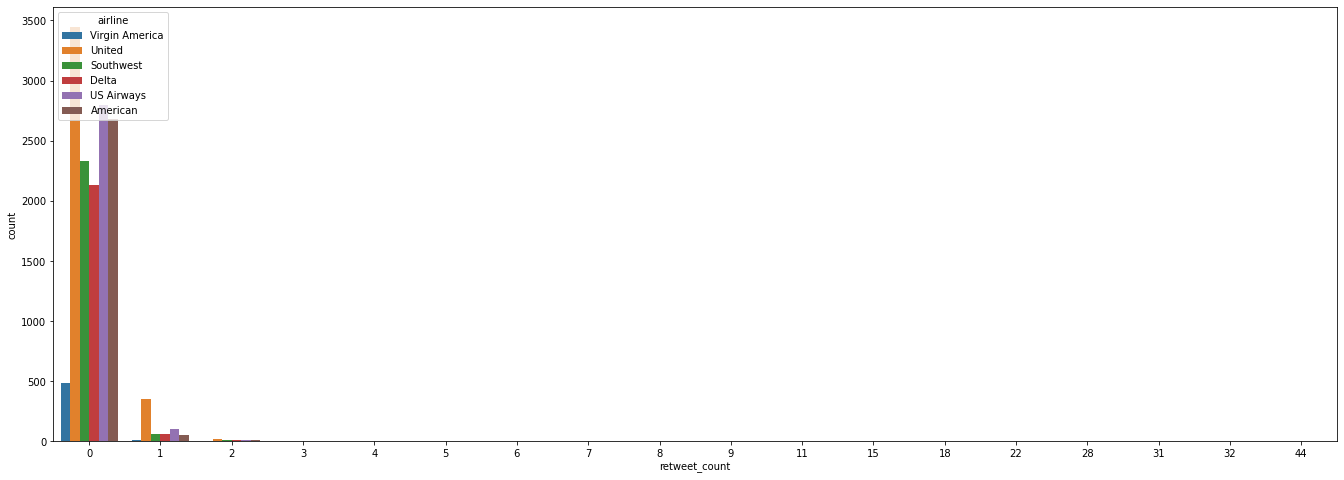

In [ ]:
#Distribution of retweet by each airline
plt.figure(figsize=(23,8))
sns.countplot(x='retweet_count', hue='airline', data=t)
plt.show()

- US Airways, American and United airlines, the tweets were mostly retweeted

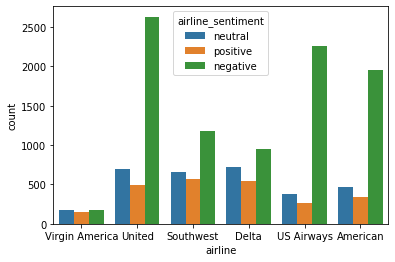

In [ ]:
#Distribution of Sentiment by the airline companies
sns.countplot(x='airline', hue='airline_sentiment', data=t)

- United, american and us airways have more negative tweets compared to positive tweets
- Virgin america have kind of similar number of postive , negative and neutral

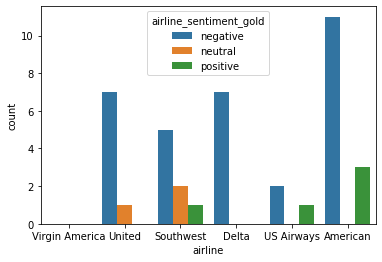

In [ ]:
#Distribution of Sentiment of gold customer by each airline
sns.countplot(x='airline', hue='airline_sentiment_gold', data=t)

- By the gold customer also american, united are in maximum negatively tweeted

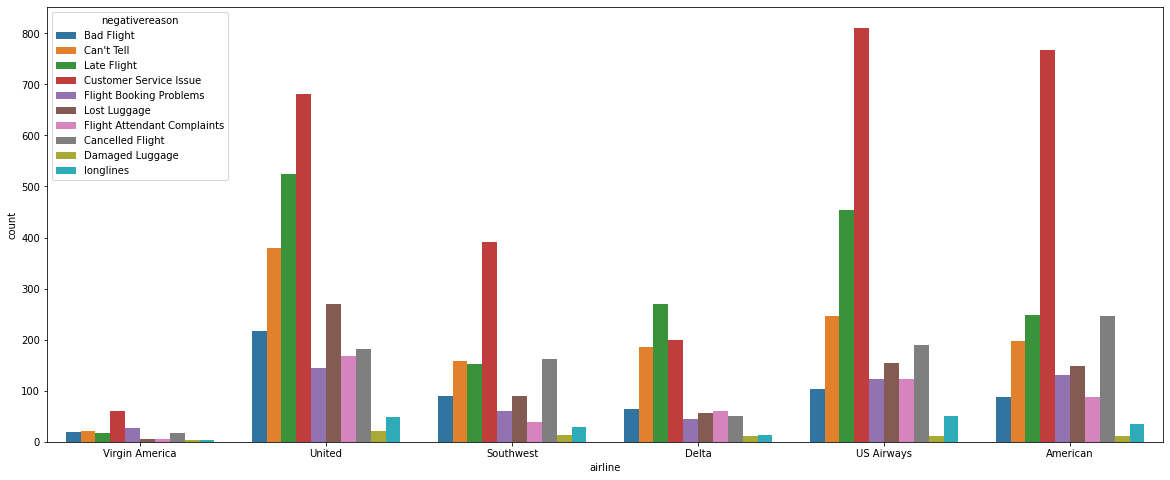

In [ ]:
#Distribution of negative reason by the airline
plt.figure(figsize=(20,8))
sns.countplot(x='airline', hue='negativereason', data=t)
plt.show()

- Two major bad reasons were, service issue and delayed flight

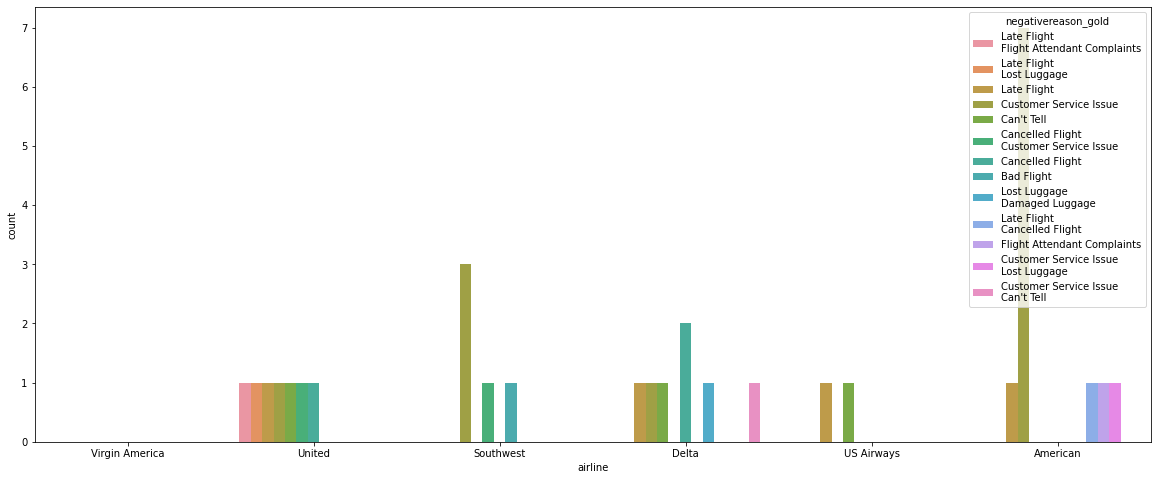

In [ ]:
# Distribution of negative reason by gold customer by airline
plt.figure(figsize=(20,8))
sns.countplot(x='airline', hue='negativereason_gold', data=t)
plt.show()

- Delayed flight is most reason of complain

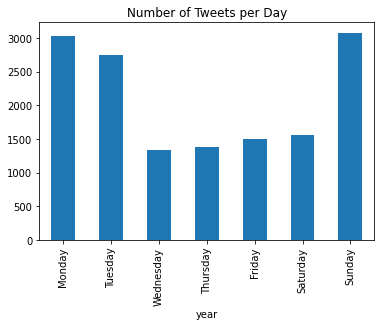

In [ ]:
# Distribution of tweet per day
t['tweet_created'] = pd.to_datetime(t['tweet_created']) # To make sure that pandas understands it's a date
plt.figsize = (16,10)

plt.title("Number of Tweets per Day")
tweet_cpt = t["tweet_created"].groupby(t["tweet_created"].dt.day_name()).count()
tweet_cpt.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")    #Assigning each day of the week as index
plt.xlabel("year")
plt.show()

- Sunday, Monday are the days, when most of tweets are created

## **Data Preprocessing **

In [ ]:
# Removal of the http link using Regular Expression.
for i, row in t.iterrows():
    clean_tweet = re.sub(r"http\S+", "", t.at[i,'text'])
    t.at[i,'text'] = clean_tweet
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Installling contractions for handling contractions in the text
!pip install contractions

In [ ]:
import contractions

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Performing replace contraction operation over all the rows of text column 
for i, row in t.iterrows():
    content = t.at[i, 'text']
    clean_content = replace_contractions(content)
    t.at[i,'text'] = clean_content
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you have added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I did not today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Dowloading punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Defining function for removing numbers and applying on the text column
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

t['text'] = t['text'].apply(lambda x: remove_numbers(x))
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you have added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I did not today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Tokenization of the data
t['text'] = t.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[@, VirginAmerica, What, @, dhepburn, said, .]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Defining function for removing Nonascii  and applying on the text column
def remove_non_ascii(words):
  """Remove non=ASCII characters from list of tokenized words"""
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [ ]:
t['text'] = t['text'].apply(lambda x: remove_non_ascii(x))
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[@, VirginAmerica, What, @, dhepburn, said, .]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Defining function to lowercase and applying on the text column
def to_lowercase(words):
  """Convert all characters to lowercase from list of tokenized words"""
  new_words = []
  for word in words: 
    new_word = word.lower()
    new_words.append(new_word)
  return new_words

In [ ]:
t['text'] = t['text'].apply(lambda x: to_lowercase(x))
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[@, virginamerica, what, @, dhepburn, said, .]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[@, virginamerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[@, virginamerica, i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[@, virginamerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[@, virginamerica, and, it, is, a, really, big, bad, thing, about, it]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Defining function for removing punctuations and applying on the text column
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [ ]:
t['text'] = t['text'].apply(lambda x: remove_punctuation(x))
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[virginamerica, what, dhepburn, said]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
#Defining some stopwords not to remove, as by removing them, the mood of sentiment may change
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


stopwords = list(set(stopwords) - set(customlist))

In [ ]:
#Defining function for removing stopwords and applying on the text column
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
      if word not in stopwords:
        new_words.append(word)
    return new_words

In [ ]:
t['text'] = t['text'].apply(lambda x: remove_stopwords(x))
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[virginamerica, dhepburn, said]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, plus, added, commercials, experience, tacky]",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[virginamerica, not, today, must, mean, need, take, another, trip]",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, really, big, bad, thing]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer  

In [ ]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Defining function for lemmatizing and applying on the text column
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

t['text'] = t['text'].apply(lambda x: lemmatize_list(x))
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[virginamerica, dhepburn, said]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, plus, added, commercial, experience, tacky]",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[virginamerica, not, today, must, mean, need, take, another, trip]",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, really, big, bad, thing]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#After performing different preprocessing joining the words, so that the vectorization can be applied
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

t['text'] = t.apply(lambda row: normalize(row['text']), axis=1)
t.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus added commercial experience tacky,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica not today must mean need take another trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


- We have above various preprocessing used. we have removed number, ascii words, punctuations, special characters, html symbols etc.
- We hve also tokenized to seperate the each words into a token
- we have used stopwords to remove stopwords. However we have excluded a few stopwords, because those could lead to the opposite meaning of the tweet or a particular sentence, such as not, have not etc.
- we have used lemmatization instead of stemming, as lemmatization conducts morphological analysis of the words and more reliable than stemming
- Finally we have joined those tokens for applying vectorization

In [ ]:
#Distribution of the words which have mostly appeared in text
t['text'] = t.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
top = Counter([item for sublist in t['text'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,flight,4568
1,united,4160
2,not,3905
3,usairways,3051
4,americanair,2961
5,southwestair,2461
6,jetblue,2395
7,get,1376
8,hour,1161
9,thanks,1079


- Flight, united, not are the most common words

In [ ]:
#Checking the number of postive tweets and negative tweets
Positive_sent = t[t['airline_sentiment']=='positive']
Negative_sent = t[t['airline_sentiment']=='negative']

In [ ]:
print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2363
Number of tweets with negative sentiment 9178


In [ ]:
#Most common positive words
top = Counter([item for sublist in Positive_sent['text'] for item in sublist])
freq_positive = pd.DataFrame(top.most_common(20))
freq_positive.columns = ['Common_words','count']
freq_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,thanks,609
1,jetblue,595
2,southwestair,576
3,united,528
4,thank,453
5,flight,436
6,americanair,355
7,usairways,276
8,great,236
9,not,199


- Thanks, Jetblue, and Southwest air are the most common positve words

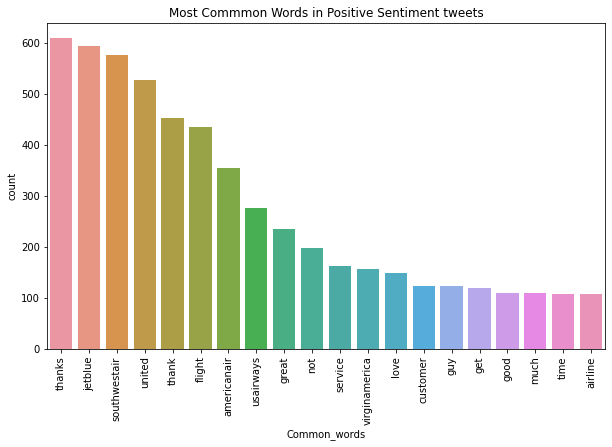

In [ ]:
# Most common words in positive tweets
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_positive, ax=ax)
plt.title("Most Commmon Words in Positive Sentiment tweets")
plt.xticks(rotation='vertical');

In [ ]:
#Most common negative words
top = Counter([item for sublist in Negative_sent['text'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative.columns = ['Common_words','count']
freq_negative.style.background_gradient(cmap='flare')

,Common_words,count
0,flight,3357
1,not,3324
2,united,2895
3,usairways,2374
4,americanair,2107
5,southwestair,1214
6,hour,1107
7,jetblue,1052
8,get,1015
9,cancelled,920


- Flight, not, united are the most common negative words

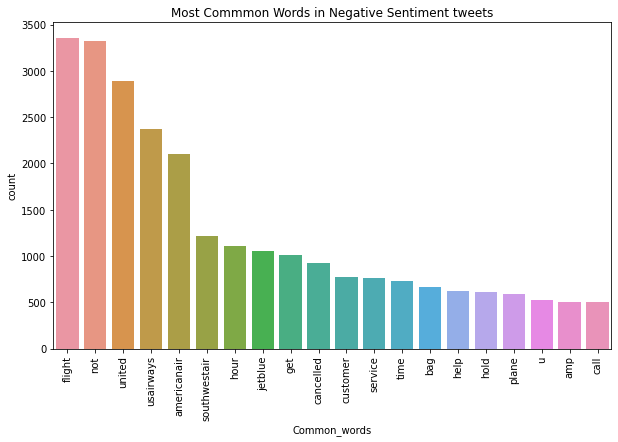

In [ ]:
#Most common words in negative sentences
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_negative, ax=ax)
plt.title("Most Commmon Words in Negative Sentiment tweets")
plt.xticks(rotation='vertical');

In [ ]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

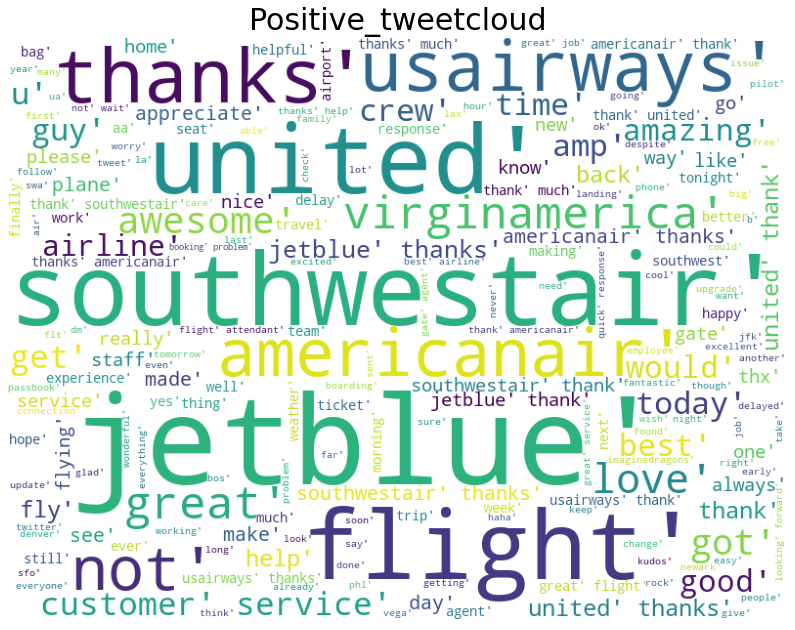

In [ ]:
#Positive tweet words in wordcloud
show_wordcloud(Positive_sent, "Positive_tweetcloud")

- Southwest, Jetblue, thanks are a few major among them

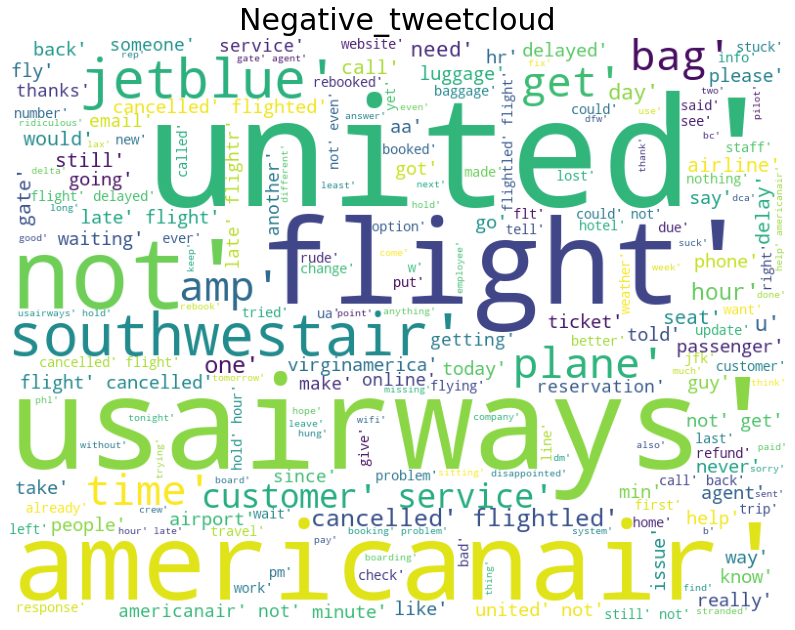

In [ ]:
show_wordcloud(Negative_sent, "Negative_tweetcloud")

- US airways, United, america air are most common negative among all

### **Model Building**

In [ ]:
#Defining a list of columns to drop and dropping those
drop_cols=['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

In [ ]:
t=t.drop(drop_cols, axis=1)

In [ ]:
t.shape

(14640, 2)

- We will use count vectorizer and tfidf vectorizer. Count vectorizer easy to use and count the frequency of the words, however do not put weight on words, which can be done in tfidf vectorizer method by punising the words which frequently appears

# COunt Vectorizer

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_fe = bow_vec.fit_transform(t['text'])

data_fe = data_fe.toarray()

In [ ]:
data_fe.shape

(14640, 2000)

In [ ]:
labels = t['airline_sentiment']

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_fe, labels, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(10248, 2000)

# **Random Forest with Count Vectorizer**

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=40, n_jobs=8)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_fe, labels, cv=10)))

RandomForestClassifier(n_estimators=40, n_jobs=8)
0.7240437158469946


- The score on train data is 0.72. We try to apply cross validation to improve the performence

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

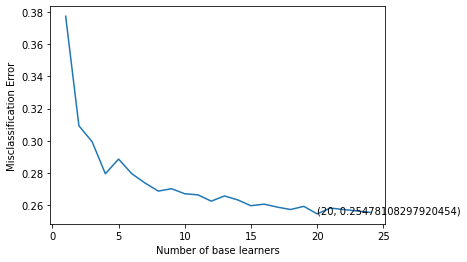

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

- The misclassification error decrease with the increase in number of base learners

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7611566484517304

- The performence is now 0.76. A improvement is visible by the performence

In [ ]:
#Predicting on the test data using 
result =  clf.predict(X_test) 

[[2498  239   77]
 [ 368  436   80]
 [ 170  115  409]]
0.7611566484517304


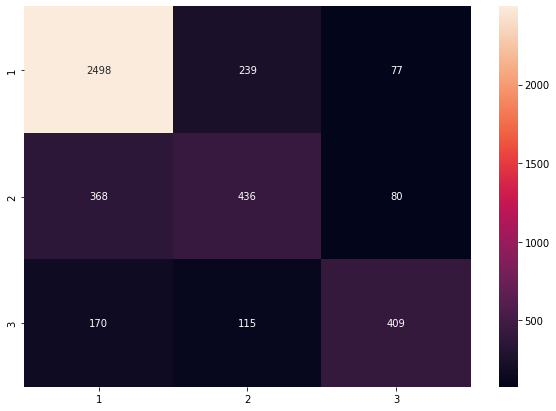

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- On the test data, the score also almost similar like 0.76

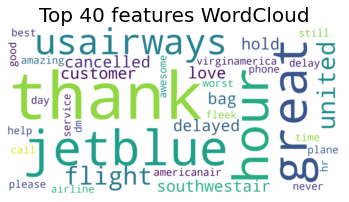

In [ ]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# **- Using Logistc Regression and CountVectorizer**

In [ ]:
#Instantiating logistic regression and fittig on train data
logistic=LogisticRegression(max_iter=200)
logistic.fit(X_train, y_train)
print(logistic)
print(np.mean(cross_val_score(logistic, data_fe, labels, cv=5)))

LogisticRegression(max_iter=200)
0.7375


In [ ]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    llf1 = LogisticRegression(max_iter=b)
    scores = cross_val_score(llf1, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

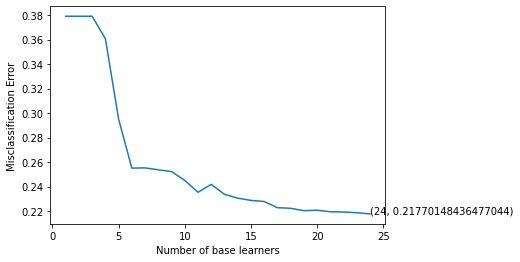

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating error on test data .
llf1 = LogisticRegression(max_iter = optimal_learners)
llf1.fit(X_train, y_train)
llf1.score(X_test, y_test)

0.7969034608378871

In [ ]:
result=llf1.predict(X_test)

[[2644  115   55]
 [ 395  421   68]
 [ 172   87  435]]
0.796903460837887


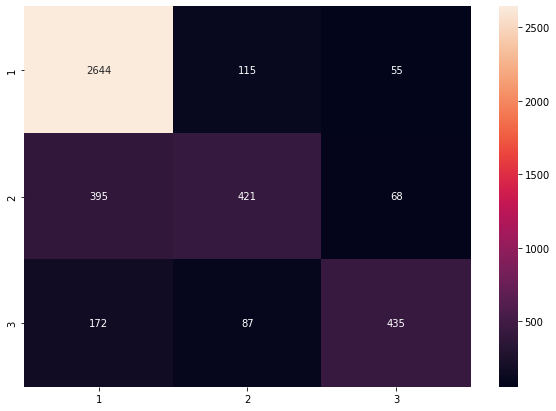

In [215]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  llf1.predict(X_test)

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# **TFIFD Vectorizer**

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(t['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

# **TFIFD Vectorizer with Random Forest**

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=30, n_jobs=5)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=30, n_jobs=5)
0.6931693989071037


- score on train data 0.69

In [ ]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

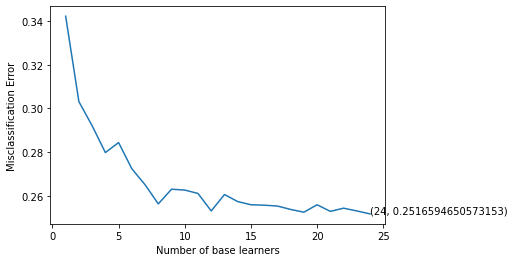

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7657103825136612

- after doing cross validation the score is 0.76

In [ ]:
result = clf.predict(X_test)

[[2630  141   43]
 [ 458  369   57]
 [ 231   99  364]]
0.7657103825136612


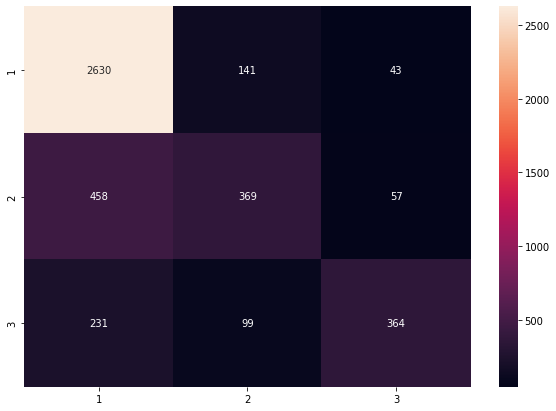

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

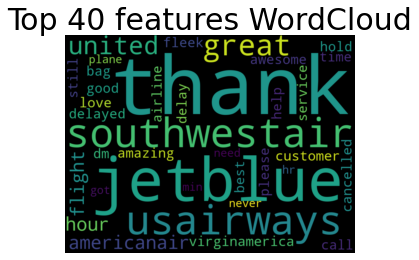

In [ ]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

# **Using Logistic Regression**

In [ ]:
#Instantiating logistic regression and fittig on train data
logistic=LogisticRegression(max_iter=200)
logistic.fit(X_train, y_train)
print(logistic)
print(np.mean(cross_val_score(logistic, data_features, labels, cv=5)))

LogisticRegression(max_iter=200)
0.7443306010928962


- on train data score is better than random forest

In [ ]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    llf = LogisticRegression(max_iter=b)
    scores = cross_val_score(llf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

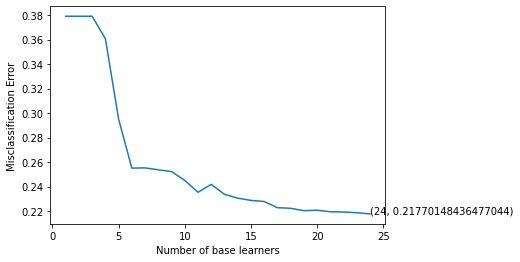

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating error on test data .
llf = LogisticRegression(max_iter = optimal_learners)
llf.fit(X_train, y_train)
llf.score(X_test, y_test)

0.7969034608378871

- Giving better score around 79 percent, whereas with random forest was 76 percent

In [ ]:
result = llf.predict(X_test)

[[2644  115   55]
 [ 395  421   68]
 [ 172   87  435]]
0.796903460837887


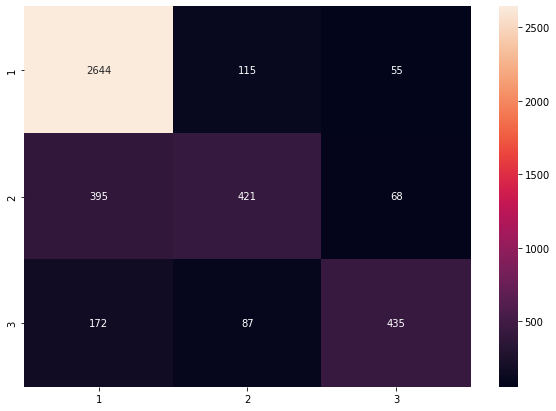

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  llf.predict(X_test)

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Conclusion and Recommendations:
- We have conducted a sentiment analysis on tweeter data by customer of different US airlines companies
- The sentiment was classifies in three class, positive, negative and neutral
- The majority of tweets was negative in content
- the customers are complaining about mainly on customer service, flight delay
- The most negatives words are united, us airways, flight etc., whereas the most words found in positive tweets are thank, jetblues etc.
- We have conducted various preprocessing steps, for example removin number, ascii, tokenization, lemmatization etc.
- we have used two different vectorizer method count vectorizer tfidf vectorizer
- We have also used two classifer, namely random forest and logistic regression nder the hood of two vectorizer.
- comperatively Logistic regression with tfidf vectorizer is giving the highest accuracy around 79 percent, slightly beter than random forest with tfidf
- The accuracy can be improved using different neural networks model probably
- Overall, we see customers are dissatisfied about the service, and frequent flight delay, as because people choose flight to be faster, If that fails, they are getting deprived from their most basic service
- US airlines companies should take serious mesarues to improve thir services, to listen the customer. 